In [ ]:
# ignore - not related to rematch2 - just developed here for convenience. to be moved..
# install libraries
%pip install rdflib
%pip install SPARQLWrapper
# %pip install prettytable

In [10]:

from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON

#  endpoints and repositories
ENDPOINT_STAGING = r"https://graphdb-test.ariadne.d4science.org/"
REPOSITORY_STAGING = f"{ENDPOINT_STAGING}repositories/ariadneplus-ts01"

ENDPOINT_PRODUCTION = r"https://graphdb.ariadne.d4science.org/"
REPOSITORY_PRODUCTION = f"{ENDPOINT_PRODUCTION}repositories/ariadneplus-pr01"

# Function to run SPARQL query against ARIADNEplus repository and return results
# NOTE: to test queries use https://graphdb-test.ariadne.d4science.org/sparql
def run_SPARQL(query, repo=REPOSITORY_PRODUCTION):
   sparql = SPARQLWrapper(repo)
   sparql.setQuery(query)
   sparql.setReturnFormat(JSON)
   sparql.setMethod('POST')
   qres = sparql.query().convert()
   data = qres['results']['bindings']
   return data

# extract item[field_name]["value"] from SPARQL results above
def item_value(item, field_name, default_value=None):
   return item.get(field_name, {}).get("value", default_value)

In [11]:
# run SPARQL query to get data for chart
data = run_SPARQL("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    
    SELECT ?type (COUNT(?uri) AS ?counter) WHERE { 
	    ?uri rdf:type ?type .        
    }
    GROUP BY ?type
    ORDER BY DESC(?counter)
    LIMIT 10
""")

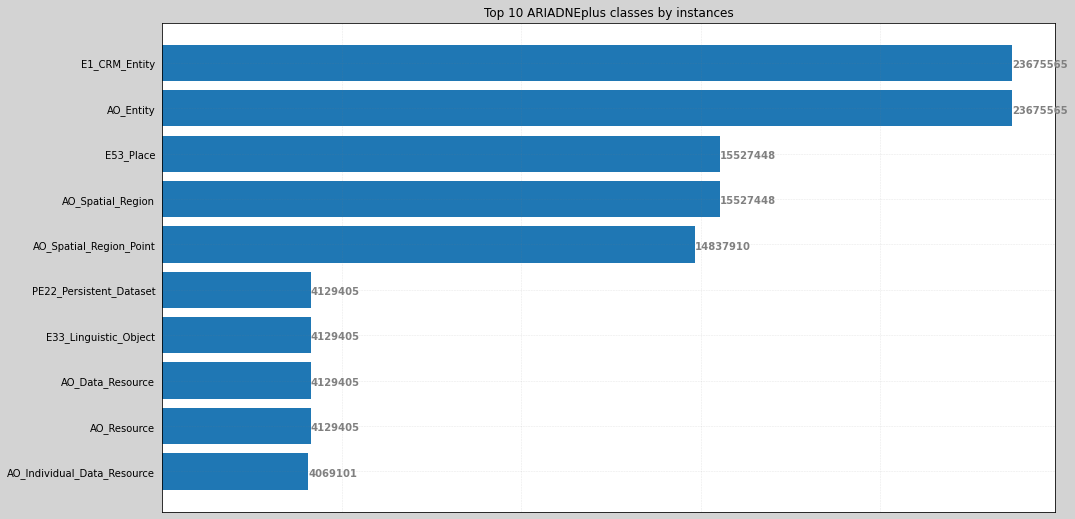

In [12]:

# show chart of data - see https://matplotlib.org/
import matplotlib.pyplot as plt
import re

def remove_uri_prefix(s):
    return re.split('[/#]', s)[-1]

# get data values and labels for pie chart
labels = [ remove_uri_prefix(item_value(item, 'type')) for item in data ]
values = [ int(item_value(item, 'counter', 0)) for item in data ]

# set up figure
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("lightgray") # background color

plt.title("Top 10 ARIADNEplus classes by instances")
#plt.xlabel("ARIADNE class")
#plt.ylabel("No of instances")

# set up Horizontal Bar Plot
ax.barh(labels, values)

# Add x, y gridlines
ax.grid(visible = True, color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.2)

# add value,- after bar
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# invert y axis, to show highest values at top..
ax.invert_yaxis()
# remove x-axis labels
ax.axes.xaxis.set_ticklabels([]) 
# Remove x, y axis ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#plt.bar(labels, values, width=1, edgecolor="white", linewidth=0.7)
#plt.grid(color='lightgray', linestyle='--', linewidth=2, axis='y', alpha=0.7)
#ax.set_xticks(range(len(values)))
#ax.set_xticklabels(labels, rotation=90)

# display the chart
plt.show()

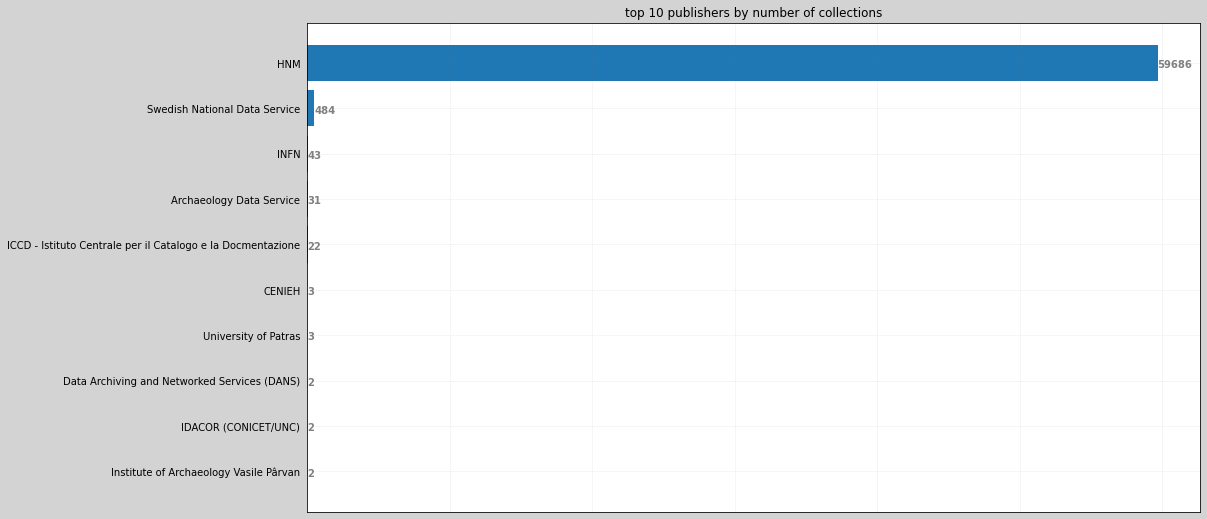

In [13]:
# show chart of data - see https://matplotlib.org/
import matplotlib.pyplot as plt
import re
import pprint

# run SPARQL query to get data for chart
data = run_SPARQL("""
    # get top 10 publishers by number of collections
    PREFIX aocat: <https://www.ariadne-infrastructure.eu/resource/ao/cat/1.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    
    SELECT ?publisher ?label (count(?uri) AS ?counter) WHERE { 
    ?uri a aocat:AO_Collection ; aocat:has_publisher ?publisher . 
        OPTIONAL { ?publisher (aocat:has_label | rdfs:label) ?label }
    }
    GROUP BY ?publisher ?label
    ORDER BY DESC(?counter)
    LIMIT 10
""")

#print(data)


# get data values and labels for pie chart
labels = [ str(item_value(item, 'label')) for item in data ]
values = [ int(item_value(item, 'counter', 0)) for item in data ]

# set up figure
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("lightgray") # background color

plt.title("top 10 publishers by number of collections")
#plt.xlabel("ARIADNE class")
#plt.ylabel("No of instances")

# set up Horizontal Bar Plot
ax.barh(labels, values)

# Add x, y gridlines
ax.grid(visible = True, color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.2)

# add value,- after bar
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# invert y axis, to show highest values at top..
ax.invert_yaxis()
# remove x-axis labels
ax.axes.xaxis.set_ticklabels([]) 
# Remove x, y axis ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# display the chart
plt.show()

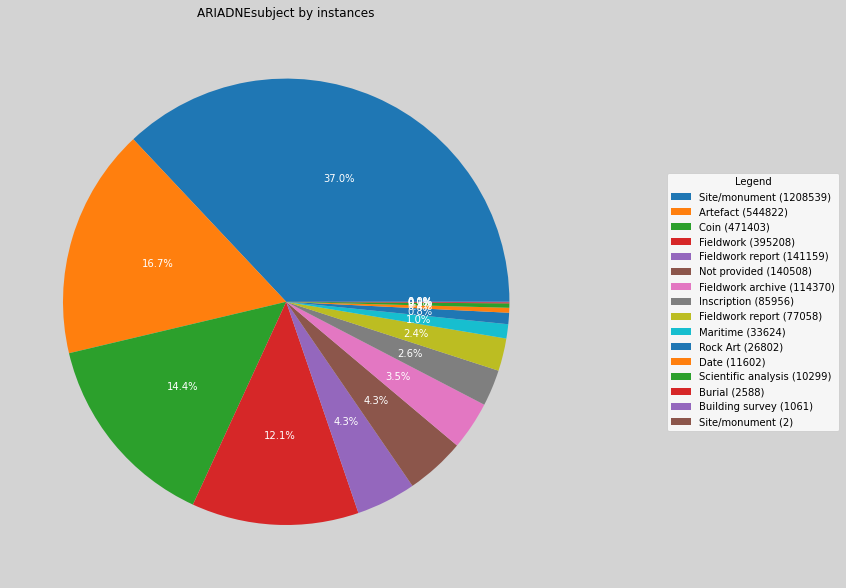

In [14]:
import matplotlib.pyplot as plt
data = run_SPARQL("""
PREFIX aocat: <https://www.ariadne-infrastructure.eu/resource/ao/cat/1.1/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
SELECT ?subject ?lbl (count(DISTINCT ?uri) AS ?counter) WHERE { 
	?uri aocat:has_ARIADNE_subject ?subject .
    OPTIONAL { ?subject skos:prefLabel ?lbl }    
}
GROUP BY ?subject ?lbl
ORDER BY DESC(?counter)
""")
# print(data)
# get data values and labels for pie chart
labels = [ f"{item_value(item, 'lbl')} ({item_value(item, 'counter')})" for item in data ]
values = [ item_value(item, 'counter') for item in data ]

# set up figure
# fig = plt.figure(figsize=(6,6))
fig, ax = plt.subplots(figsize=(10, 18))
fig.set_facecolor("lightgray") # background color
ax.set_title("ARIADNEsubject by instances")
# display pie chart
wedges, texts, autotexts = plt.pie(values, data=values, autopct='%1.1f%%', textprops=dict(color="w"))

ax.legend(wedges, labels,
        title="Legend",
        loc="center right",
        bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()


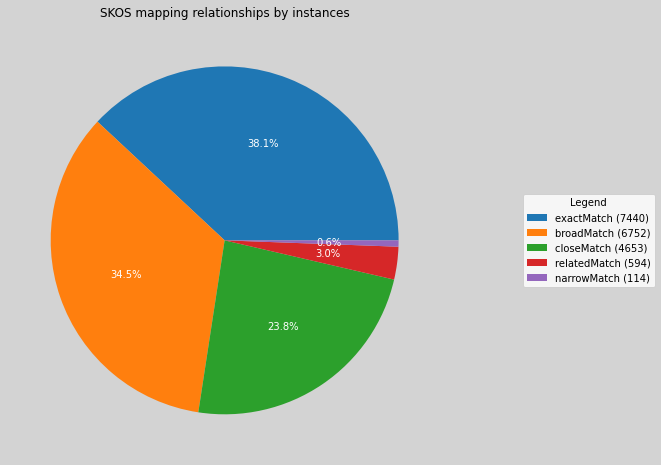

In [15]:
import matplotlib.pyplot as plt
import re

data = run_SPARQL("""
# stats for skos mapping relationships
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX void: <http://rdfs.org/ns/void#>
SELECT ?rel (count(?rel) AS ?counter) WHERE {
    ?native ?rel ?concept .
    VALUES ?rel { skos:exactMatch skos:closeMatch skos:broadMatch skos:narrowMatch skos:relatedMatch } 
	?concept void:inDataset <http://vocab.getty.edu/dataset/aat> .
}
GROUP BY ?rel
ORDER BY DESC(?counter)
""")

def remove_uri_prefix(s):
    return re.split('[/#]', s)[-1]

# get data values and labels for pie chart
labels = [ f"{remove_uri_prefix(item_value(item, 'rel'))} ({item_value(item, 'counter')})" for item in data ]
values = [ int(item_value(item, 'counter', 0)) for item in data ]

# set up figure
#fig = plt.figure(figsize=(6,6))
fig, ax = plt.subplots(figsize=(16, 8))
fig.set_facecolor("lightgray") # background color
ax.set_title("SKOS mapping relationships by instances")
# display pie chart
wedges, texts, autotexts = plt.pie(values, data=values, autopct='%1.1f%%', textprops=dict(color="w"))

ax.legend(wedges, labels,
        title="Legend",
        loc="center right",
        bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()
